In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [0]:
start_date = datetime.datetime(2019,1,1)
end_date = datetime.date.today()

In [0]:
tesla = web.DataReader('TSLA','yahoo',start_date, end_date)
ford = web.DataReader('FORD','yahoo',start_date, end_date)
GM = web.DataReader('GM','yahoo',start_date, end_date)

In [132]:
print(tesla.head(),ford.head(),GM.head())

                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2019-01-02  315.130005  298.799988  ...  11658600  310.119995
2019-01-03  309.399994  297.380005  ...   6954400  300.359985
2019-01-04  318.000000  302.730011  ...   7394100  317.690002
2019-01-07  336.739990  317.750000  ...   7551200  334.959991
2019-01-08  344.010010  327.019989  ...   7008500  335.350006

[5 rows x 6 columns]             High   Low  Open  Close  Volume  Adj Close
Date                                                  
2019-01-02  1.34  1.26  1.27   1.34   10300       1.34
2019-01-03  1.34  1.30  1.34   1.30    9700       1.30
2019-01-04  1.39  1.30  1.32   1.34    9800       1.34
2019-01-07  1.40  1.29  1.33   1.35   22200       1.35
2019-01-08  1.38  1.32  1.37   1.34   15800       1.34                  High        Low       Open      Close      Volume  Adj Close
Date                                                                         
201

**###Plot based on opening prices###**

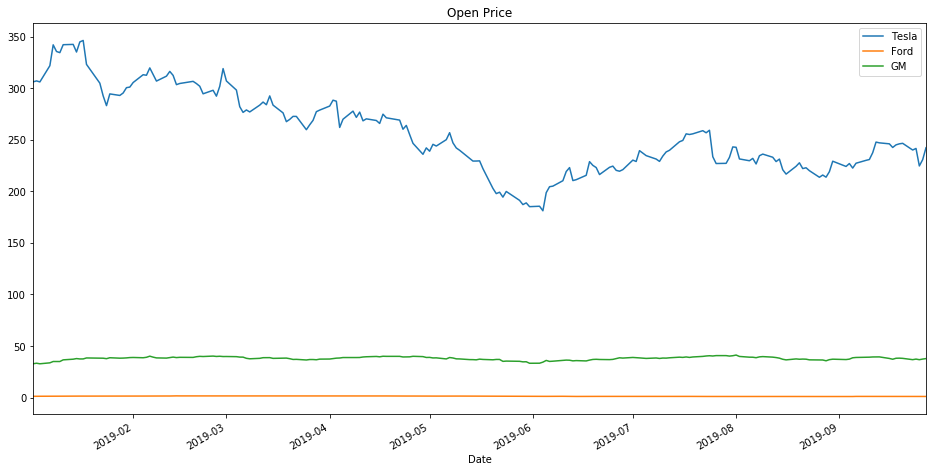

In [133]:

tesla['Open'].plot(label='Tesla', figsize=(16,8), title='Open Price')
ford['Open'].plot(label='Ford')
GM['Open'].plot(label='GM')
plt.legend();

**###Plot based on Adjusted Closing Prices of each stock###**

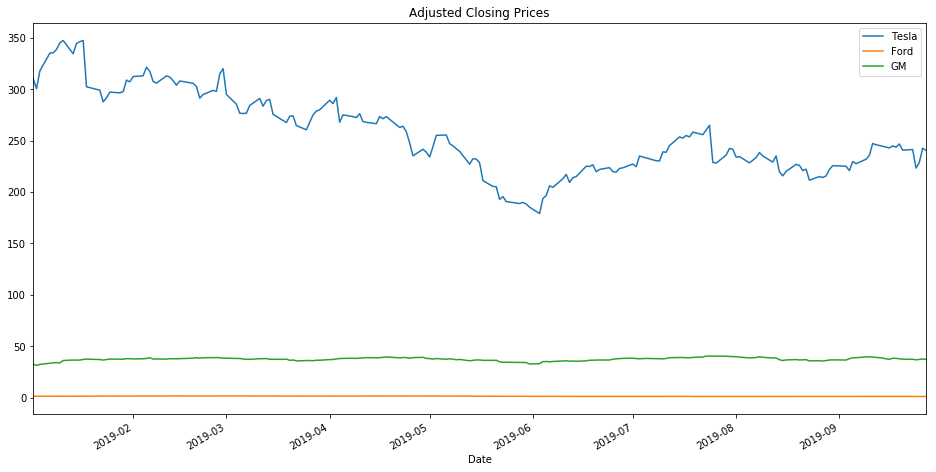

In [134]:

tesla['Adj Close'].plot(label='Tesla', figsize=(16,8), title='Adjusted Closing Prices')
ford['Adj Close'].plot(label='Ford')
GM['Adj Close'].plot(label='GM')
plt.legend();

**###Plot based on Adjusted Closing Prices of each stock###**

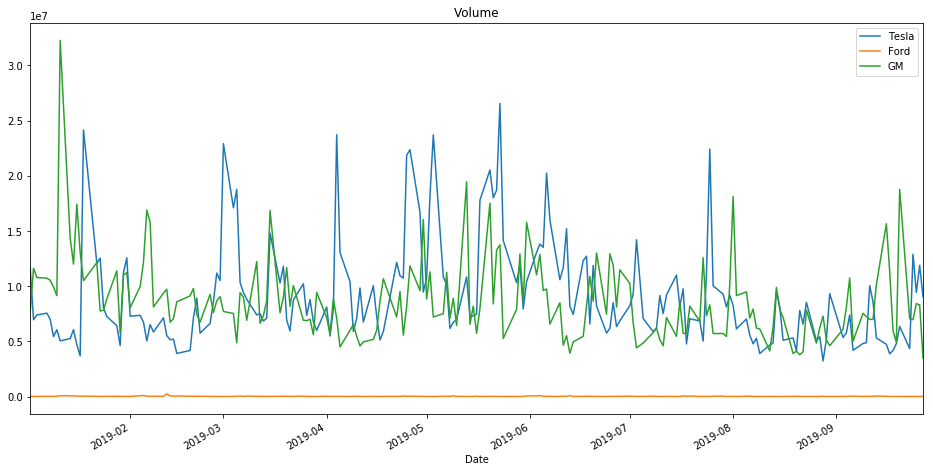

In [135]:

tesla['Volume'].plot(label='Tesla', figsize=(16,8), title='Volume')
ford['Volume'].plot(label='Ford')
GM['Volume'].plot(label='GM')
plt.legend();

###What are the dates of maximum trading volumes for each stock symbol###

In [136]:
tesla['Volume'].idxmax()

Timestamp('2019-05-23 00:00:00')

In [137]:
ford['Volume'].idxmax()

Timestamp('2019-02-12 00:00:00')

In [138]:
GM['Volume'].idxmax()

Timestamp('2019-01-11 00:00:00')

###Dollars Traded for the day###
Formula => Opening Price * Volume

Text(0, 0.5, 'Total Traded')

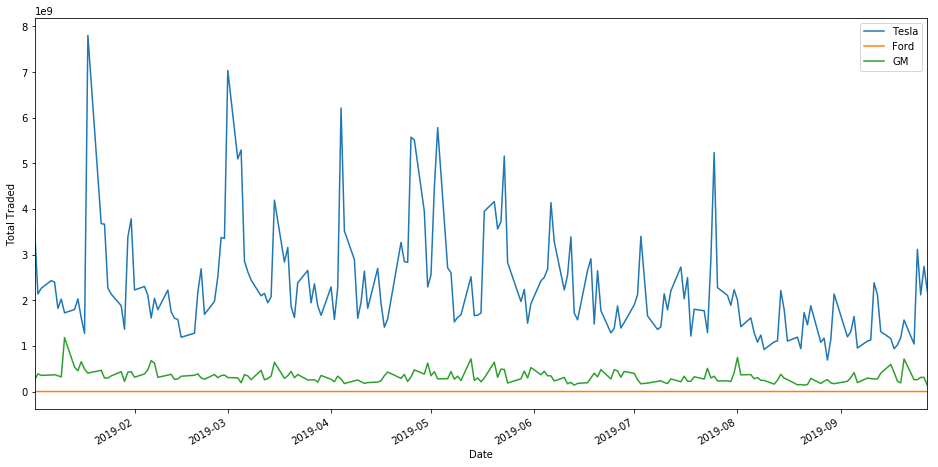

In [139]:
tesla['Total Traded']=tesla['Open'] * tesla['Volume']
ford['Total Traded']=ford['Open'] * ford['Volume']
GM['Total Traded']=GM['Open'] * GM['Volume']


#Plot based on Total_Traded Amount in Dollars
tesla['Total Traded'].plot(label='Tesla', figsize=(16,8))
ford['Total Traded'].plot(label='Ford')
GM['Total Traded'].plot(label='GM')
plt.legend()
plt.ylabel('Total Traded')

In [140]:
tesla['Total Traded'].idxmax()

Timestamp('2019-01-18 00:00:00')

In [141]:
ford['Total Traded'].idxmax()

Timestamp('2019-02-12 00:00:00')

In [142]:
GM['Total Traded'].idxmax()

Timestamp('2019-01-11 00:00:00')

###Plotting Moving Averages MA50 and MA200 for Stocks###





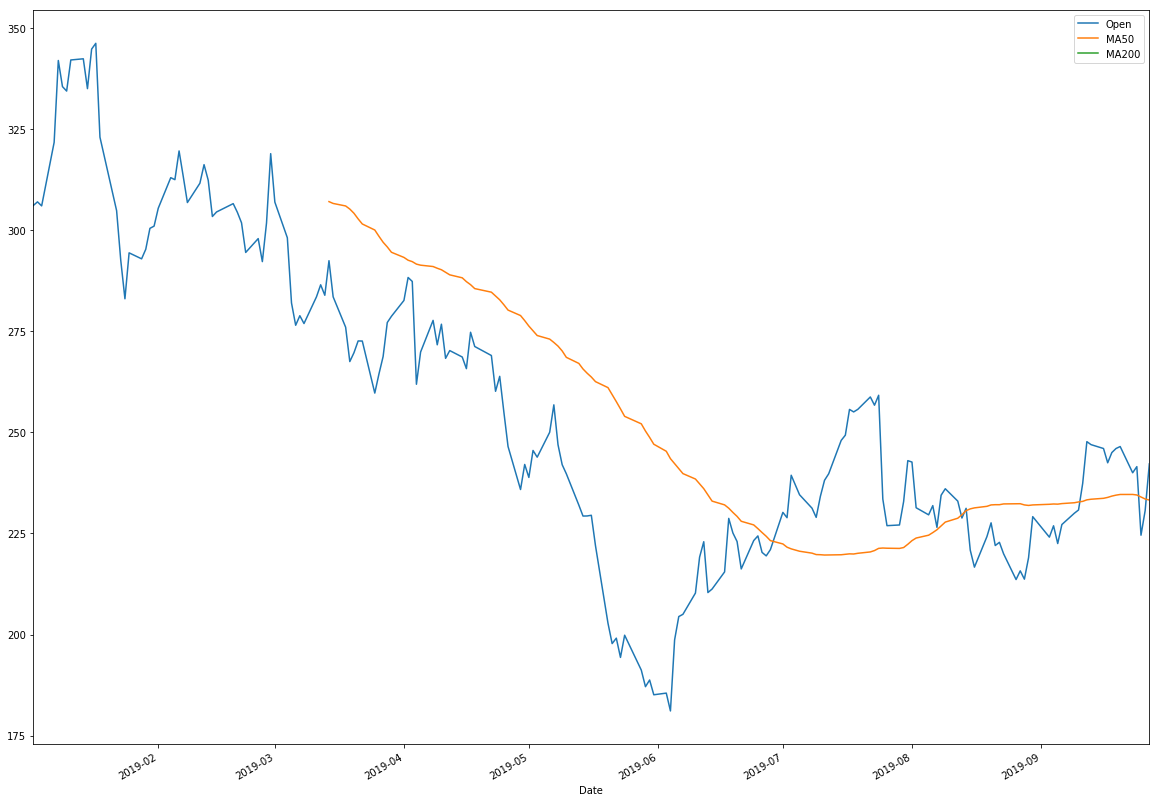

In [143]:
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla[['Open', 'MA50', 'MA200']].plot(label = 'TESLA', figsize = (20,15))

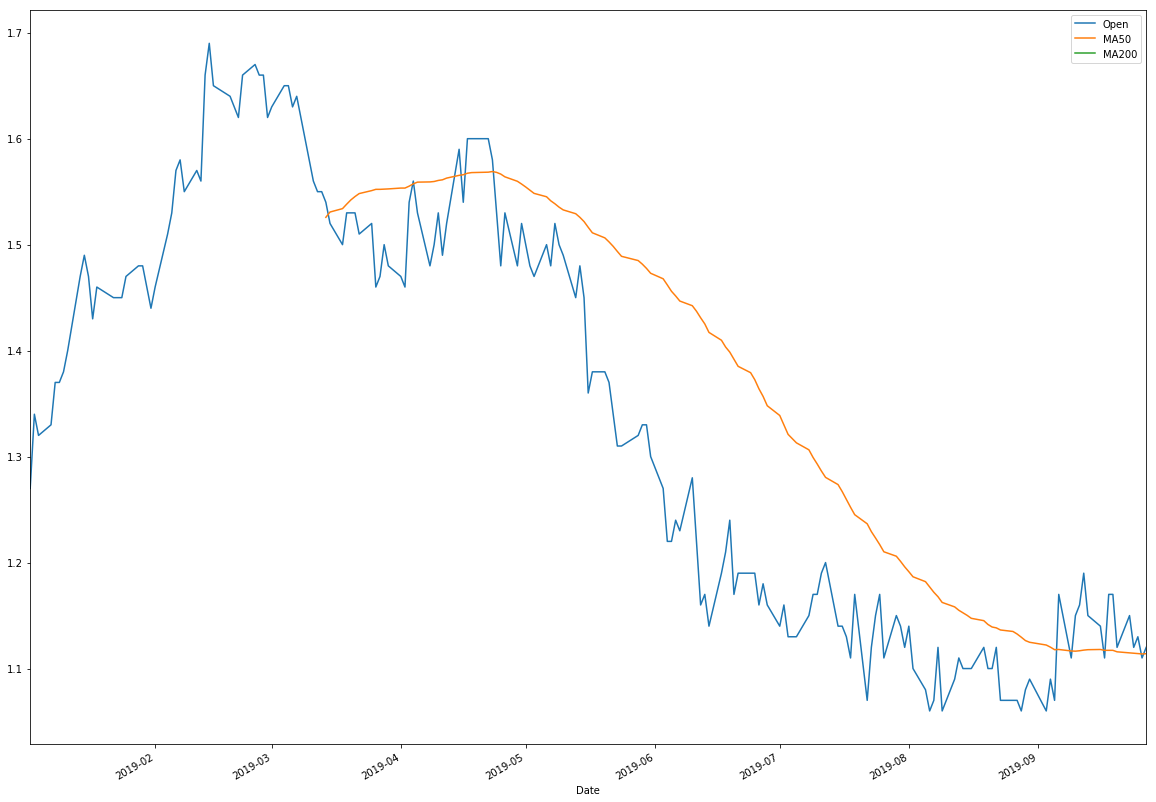

In [144]:
ford['MA50'] = ford['Open'].rolling(50).mean()
ford['MA200'] = ford['Open'].rolling(200).mean()
ford[['Open', 'MA50', 'MA200']].plot(label = 'FORD', figsize = (20,15))

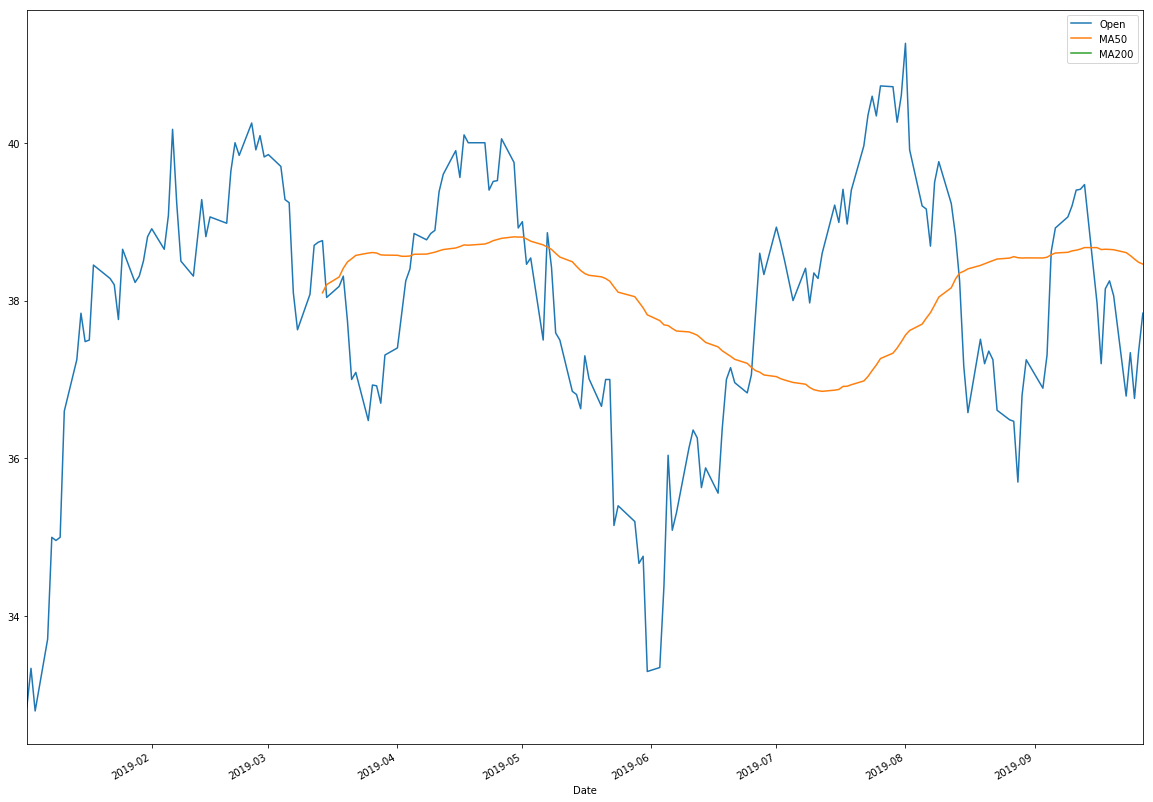

In [145]:
GM['MA50'] = GM['Open'].rolling(50).mean()
GM['MA200'] = GM['Open'].rolling(200).mean()
GM[['Open', 'MA50', 'MA200']].plot(label = 'GM', figsize = (20,15))

### Caluclating Return from the close price Column of the Stock Dataset and plotting relationships###

In [0]:
tesla['returns']= tesla['Close'].pct_change(1)

ford['returns']= ford['Close'].pct_change(1)

GM['returns']= GM['Close'].pct_change(1)

# Formula for Daily Percent change = rt = (pt/pt-1)  -1


In [147]:
print(tesla.head())
print(ford.head())
print(GM.tail())

                  High         Low        Open  ...  MA50  MA200   returns
Date                                            ...                       
2019-01-02  315.130005  298.799988  306.100006  ...   NaN    NaN       NaN
2019-01-03  309.399994  297.380005  307.000000  ...   NaN    NaN -0.031472
2019-01-04  318.000000  302.730011  306.000000  ...   NaN    NaN  0.057697
2019-01-07  336.739990  317.750000  321.720001  ...   NaN    NaN  0.054361
2019-01-08  344.010010  327.019989  341.959991  ...   NaN    NaN  0.001164

[5 rows x 10 columns]
            High   Low  Open  Close  ...  Total Traded  MA50  MA200   returns
Date                                 ...                                     
2019-01-02  1.34  1.26  1.27   1.34  ...  13080.999804   NaN    NaN       NaN
2019-01-03  1.34  1.30  1.34   1.30  ...  12998.000324   NaN    NaN -0.029851
2019-01-04  1.39  1.30  1.32   1.34  ...  12936.000514   NaN    NaN  0.030769
2019-01-07  1.40  1.29  1.33   1.35  ...  29526.000953   NaN  

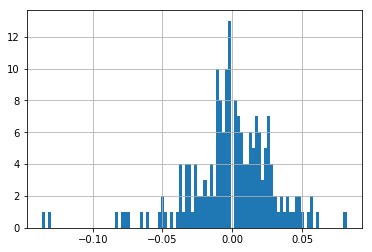

In [148]:
tesla['returns'].hist(bins=100)

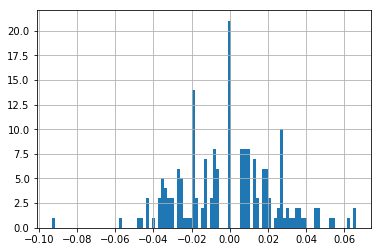

In [149]:
ford['returns'].hist(bins=100)

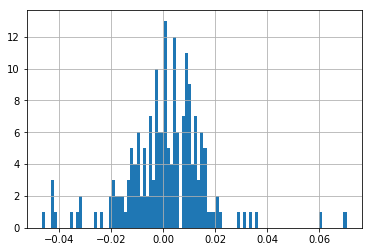

In [150]:
GM['returns'].hist(bins=100)

### LEts CReaTe ThE FunCtiOn fOr AnAlySing aBoVe CalCulAteD PArAmEtERs###

In [0]:
import seaborn as sns
def stock_analyse():
  x=input()
  start_date = datetime.datetime(2019,1,1)
  end_date = datetime.date.today()
  
  Stock_Symbol = web.DataReader(x, 'yahoo',start_date, end_date)
  print(Stock_Symbol)
  
  print("_______________________________________________________________________________________________________________________________________________________")
  
  print("Plotting High Price Trends")
  High_plot = Stock_Symbol['High'].plot(figsize=(30,20), color ='green')
  plt.legend([High_plot])
  plt.show()
#   print("Plotting High Price Distribution Pattern ")
#   a = np.array(Stock_Symbol['High'])
#   sns.distplot(a)

  print("_______________________________________________________________________________________________________________________________________________________")
  
  print("Plotting Low Price Trends")
  Low_plot = Stock_Symbol['Low'].plot(figsize=(30,20), color ='red')
  plt.legend([Low_plot])
  plt.show()
#   print("Plotting Low Price Distribution Pattern ")
#   b = np.array(Stock_Symbol['Low'])
#   sns.distplot(b)
  
  print("_______________________________________________________________________________________________________________________________________________________")
  
  print("Plotting Open Price Trends")
  Open_plot = Stock_Symbol['Open'].plot(figsize=(30,20), color ='blue')
  plt.legend([Open_plot])
  plt.show()
#   print("Plotting Open Price Distribution Pattern ")
#   c = np.array(Stock_Symbol['Open'])
#   sns.distplot(c)
  
  print("_______________________________________________________________________________________________________________________________________________________")
  

  print("Plotting Closing Price Trends")
  Close_plot = Stock_Symbol['Close'].plot(figsize=(30,20), color ='orange')
  plt.legend([Close_plot])
  plt.show()
#   print("Plotting Closing Price Distribution Pattern ")
#   d = np.array(Stock_Symbol['Close'])
#   sns.distplot(d)
  
  
  print("_______________________________________________________________________________________________________________________________________________________")
  
  print("Plotting Volume Traded Trends")
  Volume_plot = Stock_Symbol['Volume'].plot(figsize=(30,20),color ='purple')
  plt.legend([Volume_plot])
  plt.show() 
#   print("Plotting Volume Distribution Pattern ")
#   e = np.array(Stock_Symbol['Volume'])
#   sns.distplot(e)
  
  print("_______________________________________________________________________________________________________________________________________________________")
  
  print("Plotting Adjusted CLosing Price Trends")
  Adj_CLose_plot = Stock_Symbol['Adj Close'].plot(figsize=(30,20), color ='orange')
  plt.legend([Adj_CLose_plot])
  plt.show()
#   print("Plotting Adjusted Closing Price Distribution Pattern ")
#   f = np.array(Stock_Symbol['Adj Close'])
#   sns.distplot(f)
  
  print("_______________________________________________________________________________________________________________________________________________________")
  print("_______________________________________________________________________________________________________________________________________________________")
  
  print("What is the date with maximum High Price for given stock symbol?")
  print(Stock_Symbol['High'].idxmax())
  
  print("What is the date with minimum Low Price for given stock symbol?")
  print(Stock_Symbol['Low'].idxmin())
  
  print("What is the date with minimum Close Price for given stock symbol?")
  print(Stock_Symbol['Close'].idxmin())
  
  
  print("What is the date with maximum Open Price for given stock symbol?")
  print(Stock_Symbol['Open'].idxmax())
  
  
  print("What is the date with maximum Volume Traded for given stock symbol?")
  print(Stock_Symbol['Volume'].idxmax())
  
  
  print("What is the date with maximum Adjusted Closing Price for given stock symbol?")
  print(Stock_Symbol['Adj Close'].idxmin())
  
  print("_______________________________________________________________________________________________________________________________________________________")
  print("_______________________________________________________________________________________________________________________________________________________")
  
  print("Dollars Traded for the day :-> Formula => Opening Price * Volume")
  Stock_Symbol['Total Traded']=Stock_Symbol['Open'] * Stock_Symbol['Volume']
  print("Date when maximum Dollars are traded")
  print(Stock_Symbol['Total Traded'].idxmax())
  print("Date when minimum Dollars are traded")
  print(Stock_Symbol['Total Traded'].idxmin())
#   Total_Traded_plot = Stock_Symbol['Total_Traded'].plot(figsize=(30,20), label='Total Traded', color ='teal')
#   plt.legend(Total_Traded_plot)
  
  print("_______________________________________________________________________________________________________________________________________________________")
  print("_______________________________________________________________________________________________________________________________________________________")
  print("Plotting Moving Averages MA50 and MA200 for Stocks to indicate bullish and bearish nature of the given stocks")
  Stock_Symbol['MA50'] = Stock_Symbol['Open'].rolling(50).mean()
  Stock_Symbol['MA200'] = Stock_Symbol['Open'].rolling(200).mean()
  Stock_Symbol[['Open', 'MA50', 'MA200']].plot(figsize = (20,15))
  
  print("_______________________________________________________________________________________________________________________________________________________")
  print("_______________________________________________________________________________________________________________________________________________________")
  
  print("Caluclating Return from the close price Column of the Stock Dataset and plotting relationships")
  Stock_Symbol['returns']= Stock_Symbol['Close'].pct_change(1)
  Stock_Symbol['returns'].plot(figsize=(30,20), color ='teal')
  
  

# Formula for Daily Percent change = rt = (pt/pt-1)  -1
  
  print("_______________________________________________________________________________________________________________________________________________________")
  print("_______________________________________________________________________________________________________________________________________________________")
  print("Histogram Distribution of Returns as calculated above")
  Stock_Symbol['returns'].hist(bins=100)
  
  
  print("_______________________________________________________________________________________________________________________________________________________")
  print("_______________________________________________________________________________________________________________________________________________________")
  
  
  print(Stock_Symbol.tail())
 

WDAY
                  High         Low        Open       Close   Volume   Adj Close
Date                                                                           
2019-01-02  160.000000  155.350006  155.960007  159.740005  1796500  159.740005
2019-01-03  158.800003  152.320007  156.600006  154.020004  1828800  154.020004
2019-01-04  165.000000  155.580002  157.759995  163.350006  3077700  163.350006
2019-01-07  166.940002  162.770004  164.110001  163.500000  3294200  163.500000
2019-01-08  167.000000  161.139999  165.119995  166.949997  2146600  166.949997
2019-01-09  169.080002  165.429993  168.000000  166.179993  2471500  166.179993
2019-01-10  168.100006  164.020004  165.009995  167.960007  1768300  167.960007
2019-01-11  169.509995  166.259995  167.169998  167.460007  1422400  167.460007
2019-01-14  166.929993  163.139999  165.389999  163.330002  1816700  163.330002
2019-01-15  166.520004  163.699997  164.389999  164.470001  3023400  164.470001
2019-01-16  165.559998  162.130005 

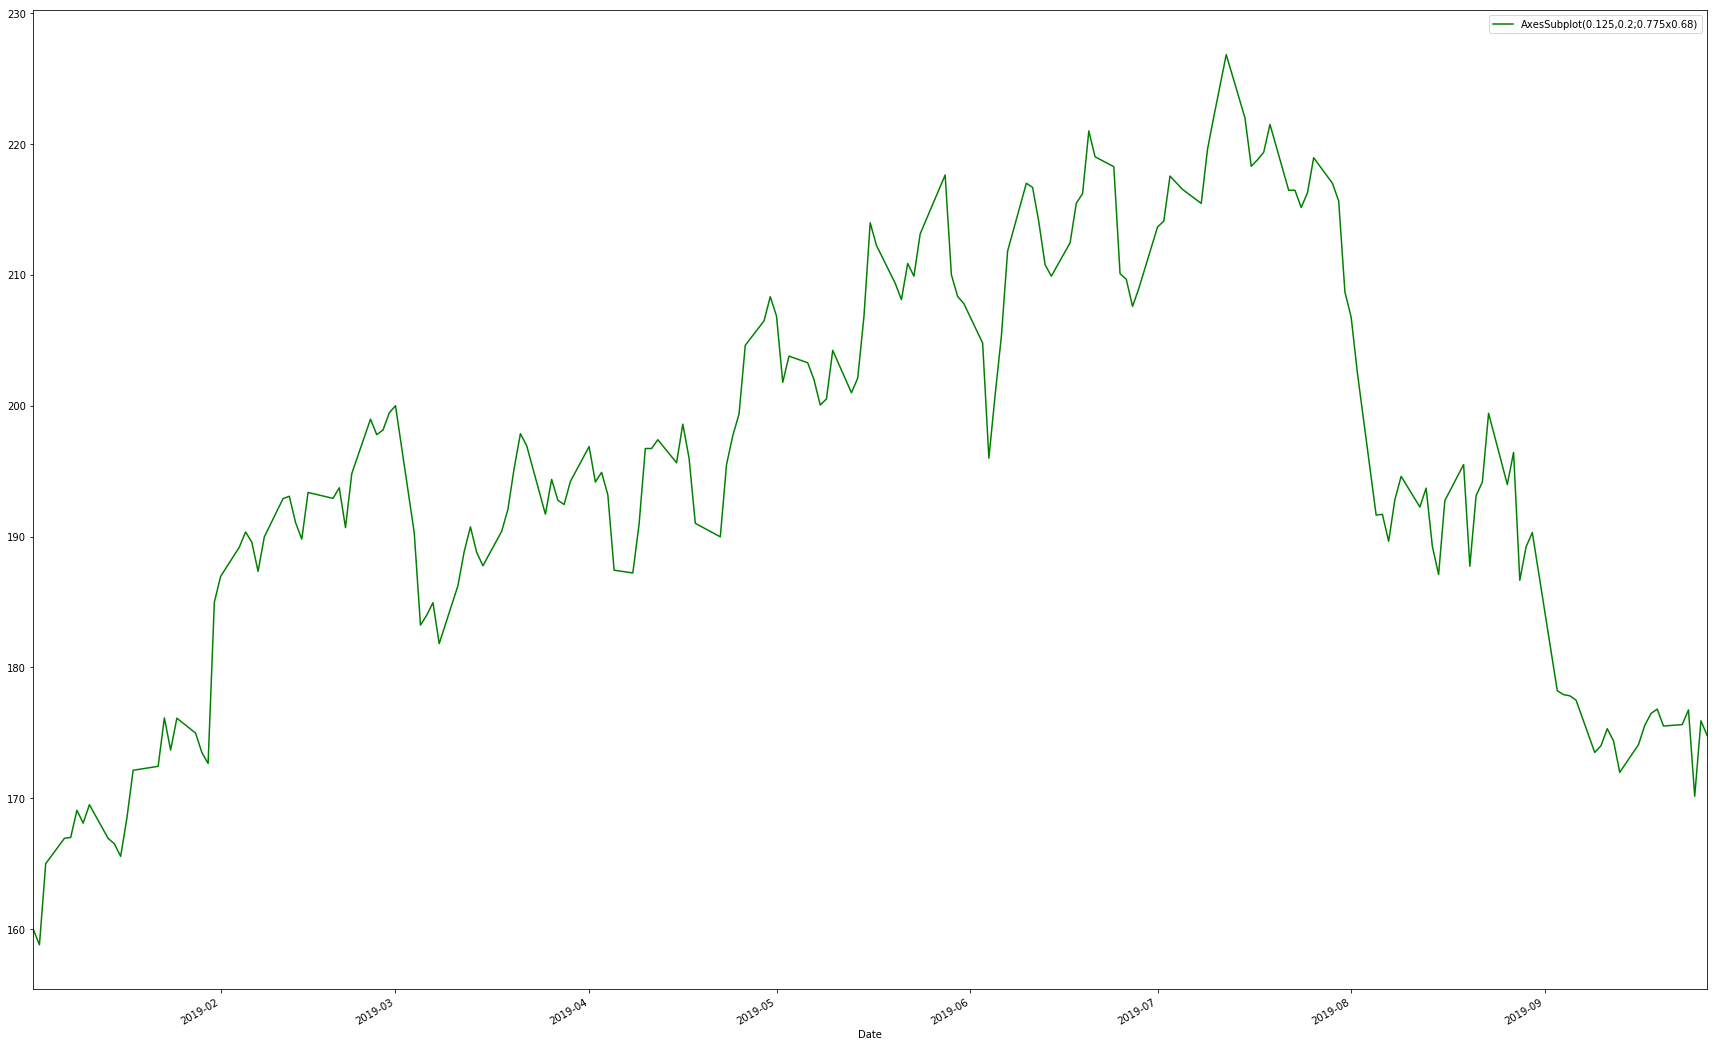

_______________________________________________________________________________________________________________________________________________________
Plotting Low Price Trends


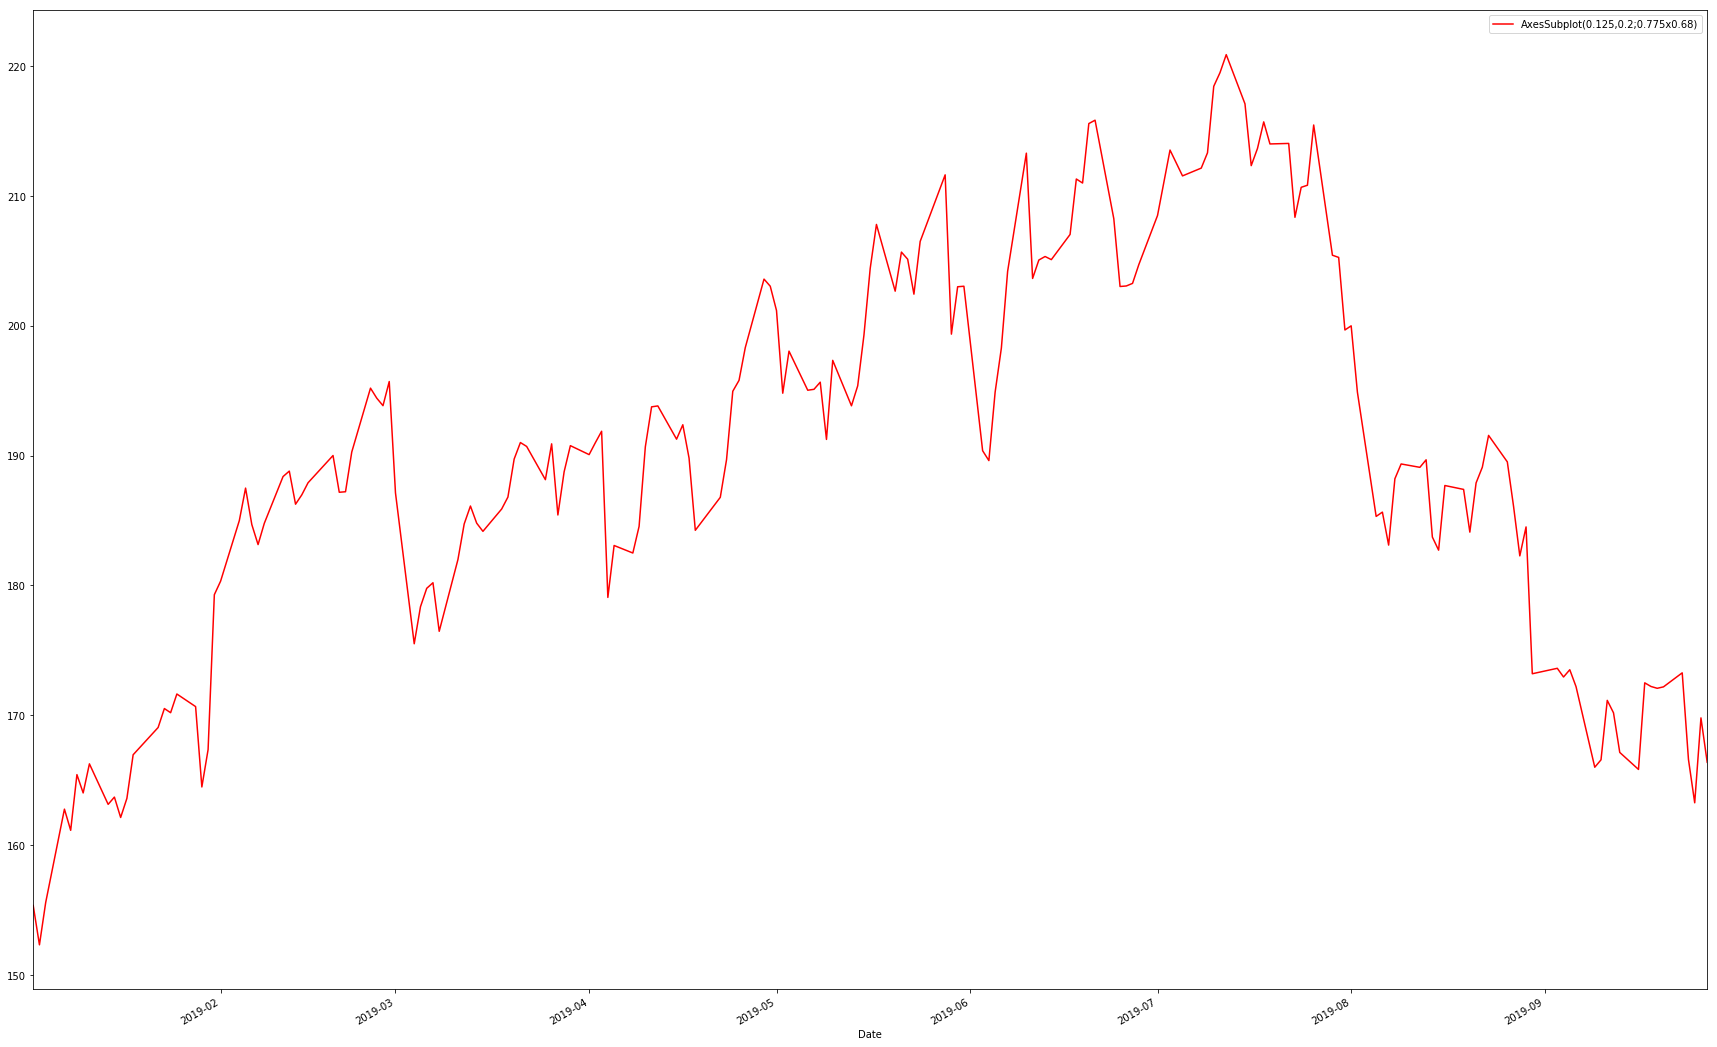

_______________________________________________________________________________________________________________________________________________________
Plotting Open Price Trends


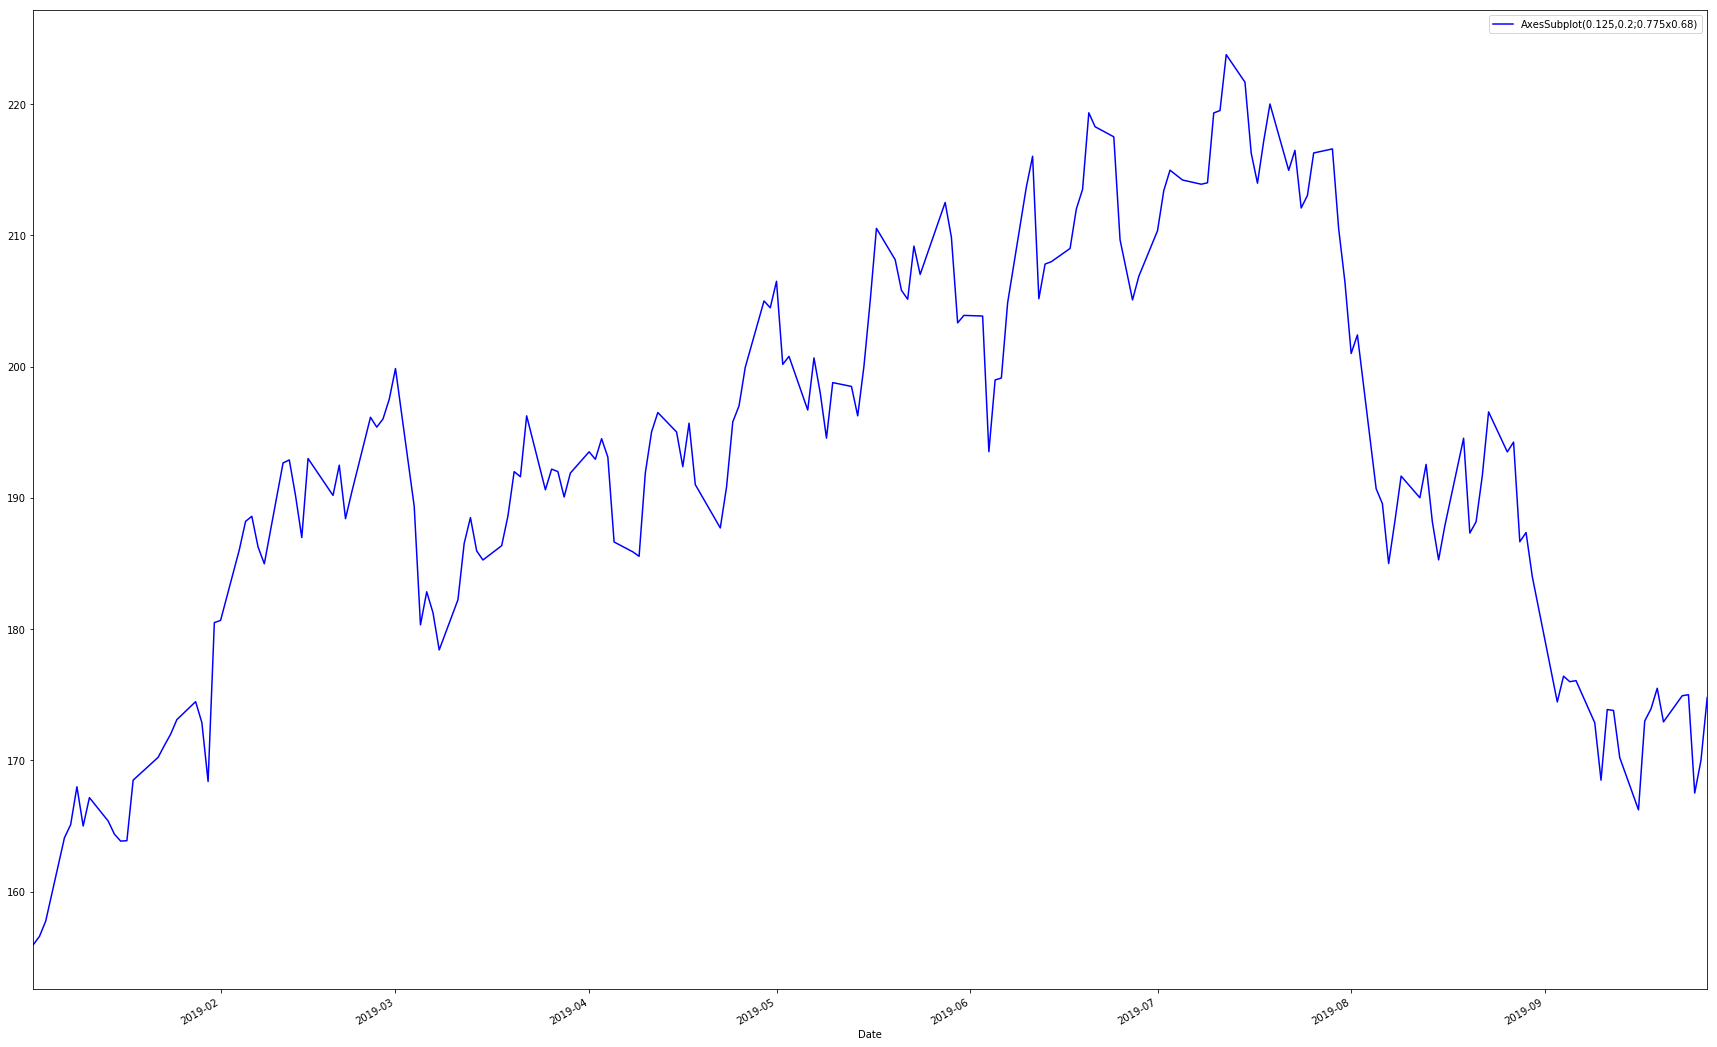

_______________________________________________________________________________________________________________________________________________________
Plotting Closing Price Trends


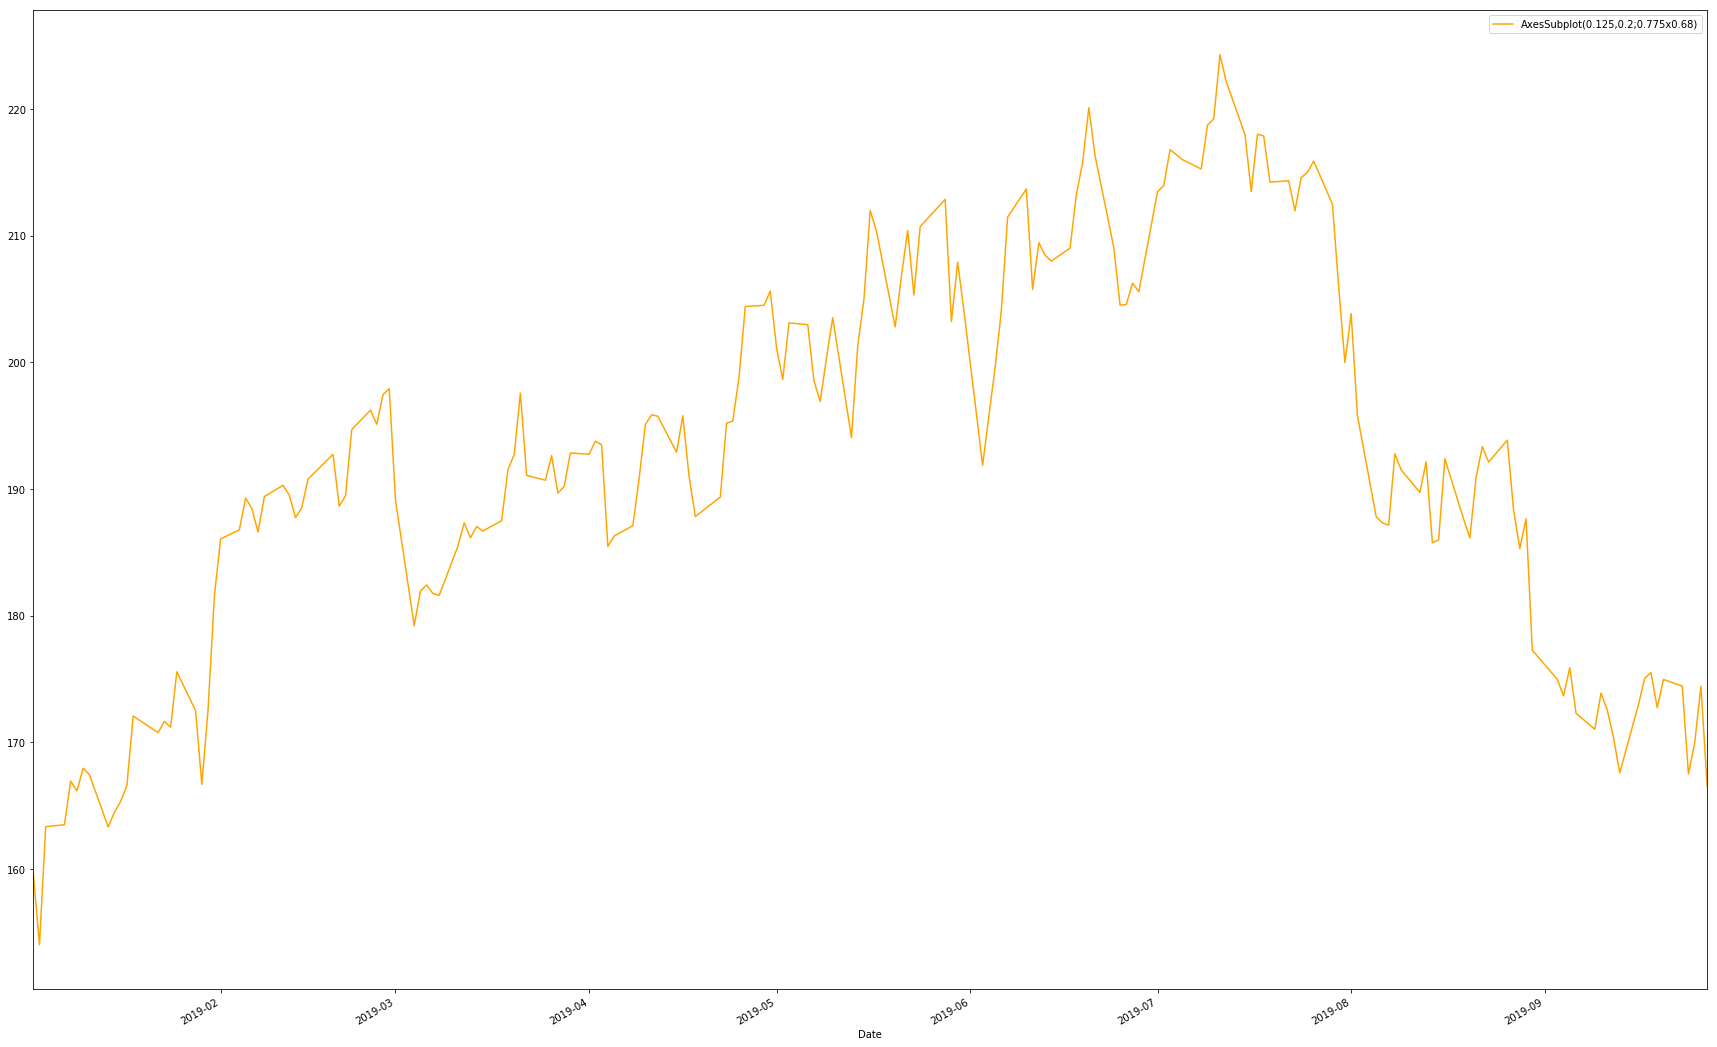

_______________________________________________________________________________________________________________________________________________________
Plotting Volume Traded Trends


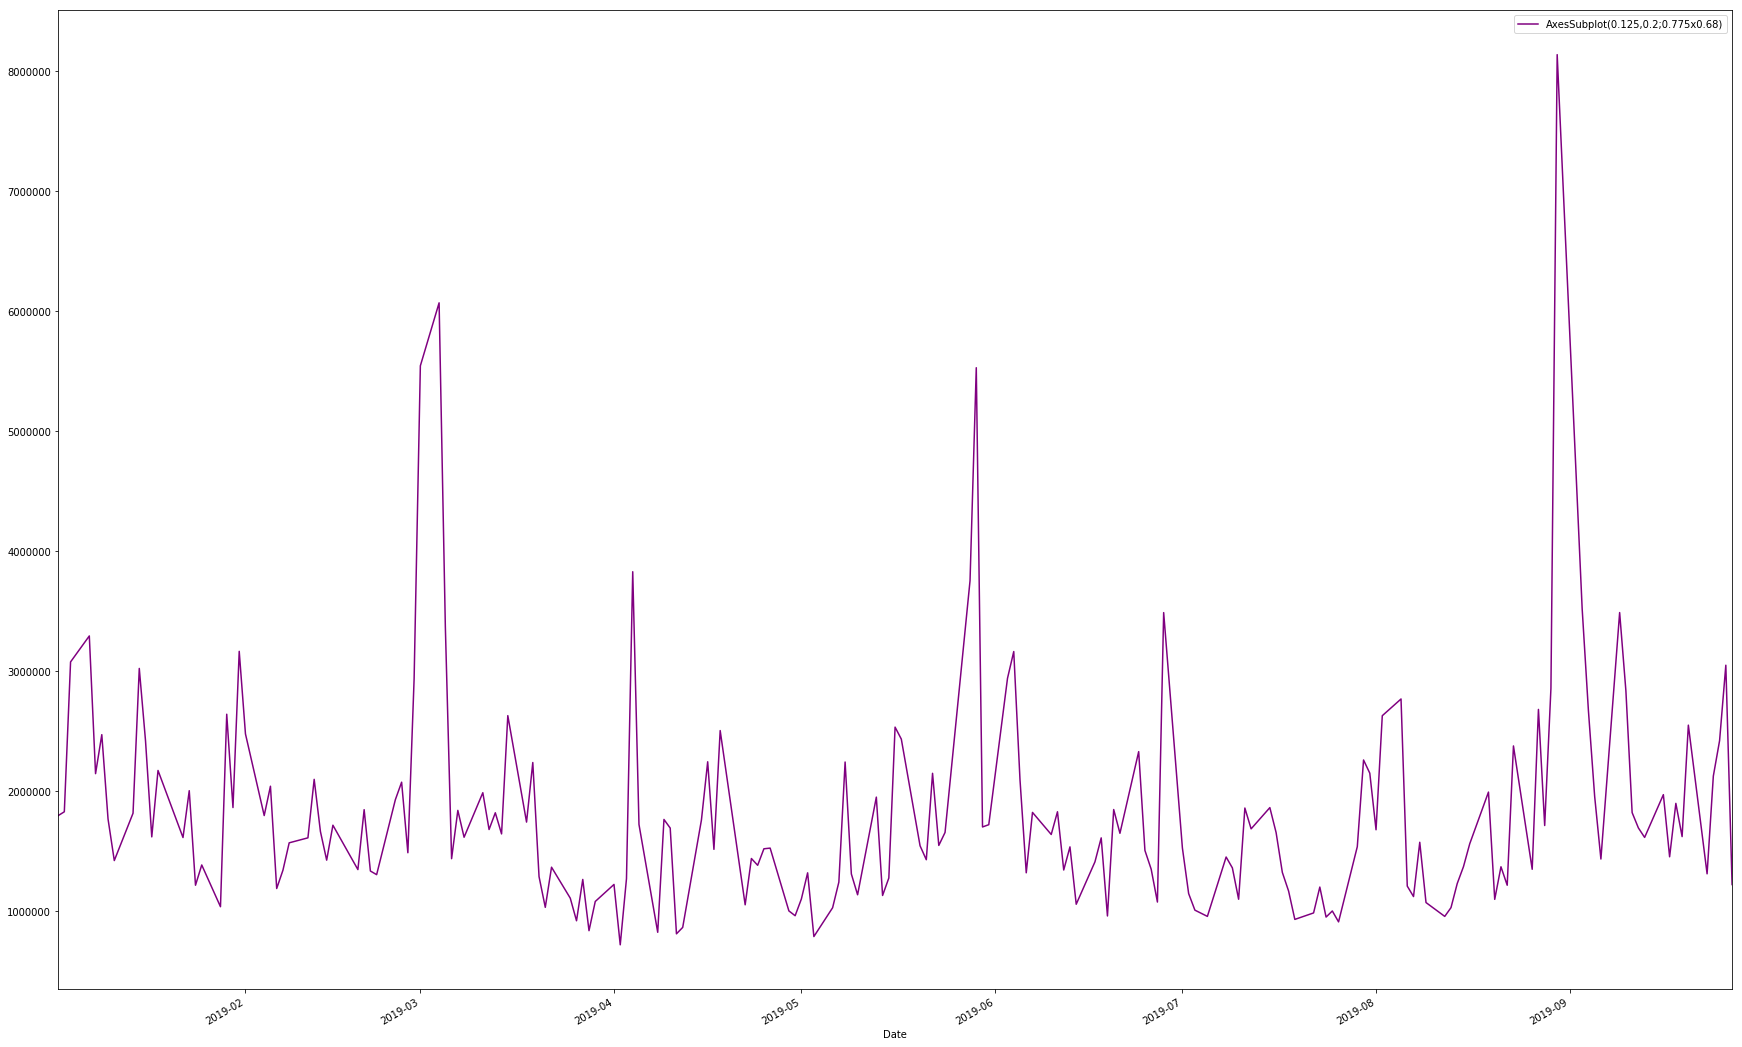

_______________________________________________________________________________________________________________________________________________________
Plotting Adjusted CLosing Price Trends


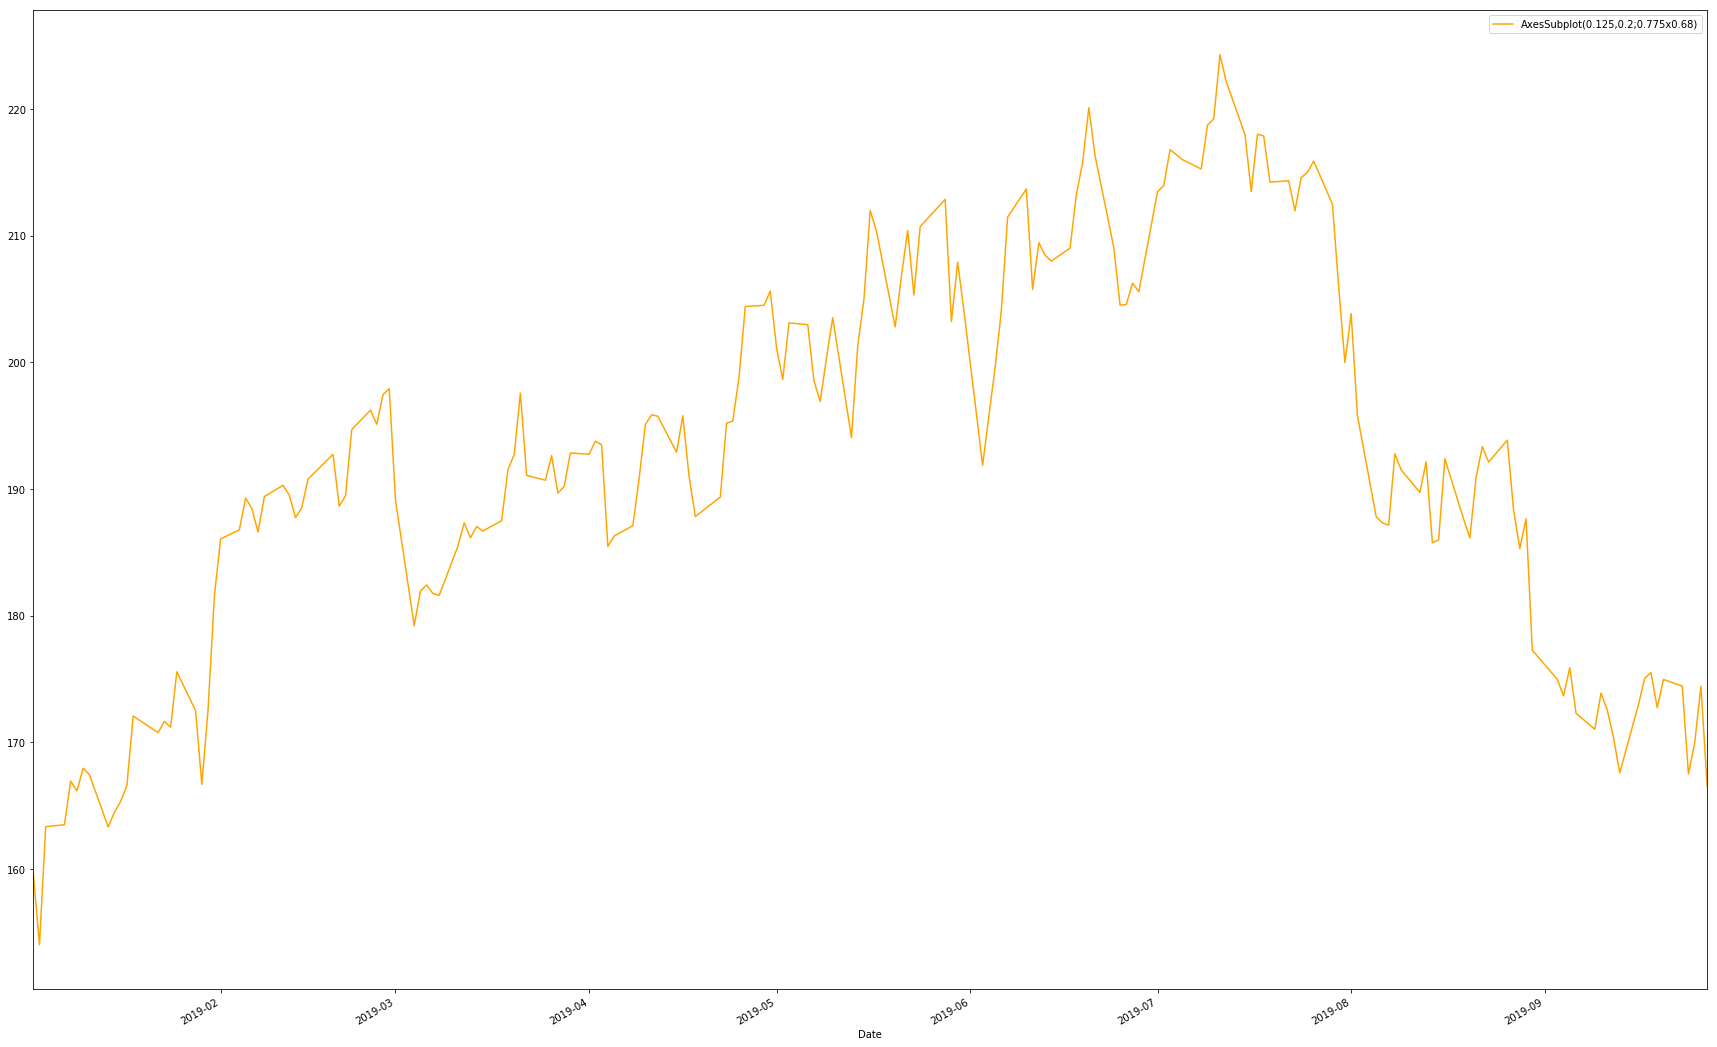

_______________________________________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________________________________
What is the date with maximum High Price for given stock symbol?
2019-07-12 00:00:00
What is the date with minimum Low Price for given stock symbol?
2019-01-03 00:00:00
What is the date with minimum Close Price for given stock symbol?
2019-01-03 00:00:00
What is the date with maximum Open Price for given stock symbol?
2019-07-12 00:00:00
What is the date with maximum Volume Traded for given stock symbol?
2019-08-30 00:00:00
What is the date with maximum Adjusted Closing Price for given stock symbol?
2019-01-03 00:00:00
_______________________________________________________________________________________________________________________________________________________
___________________

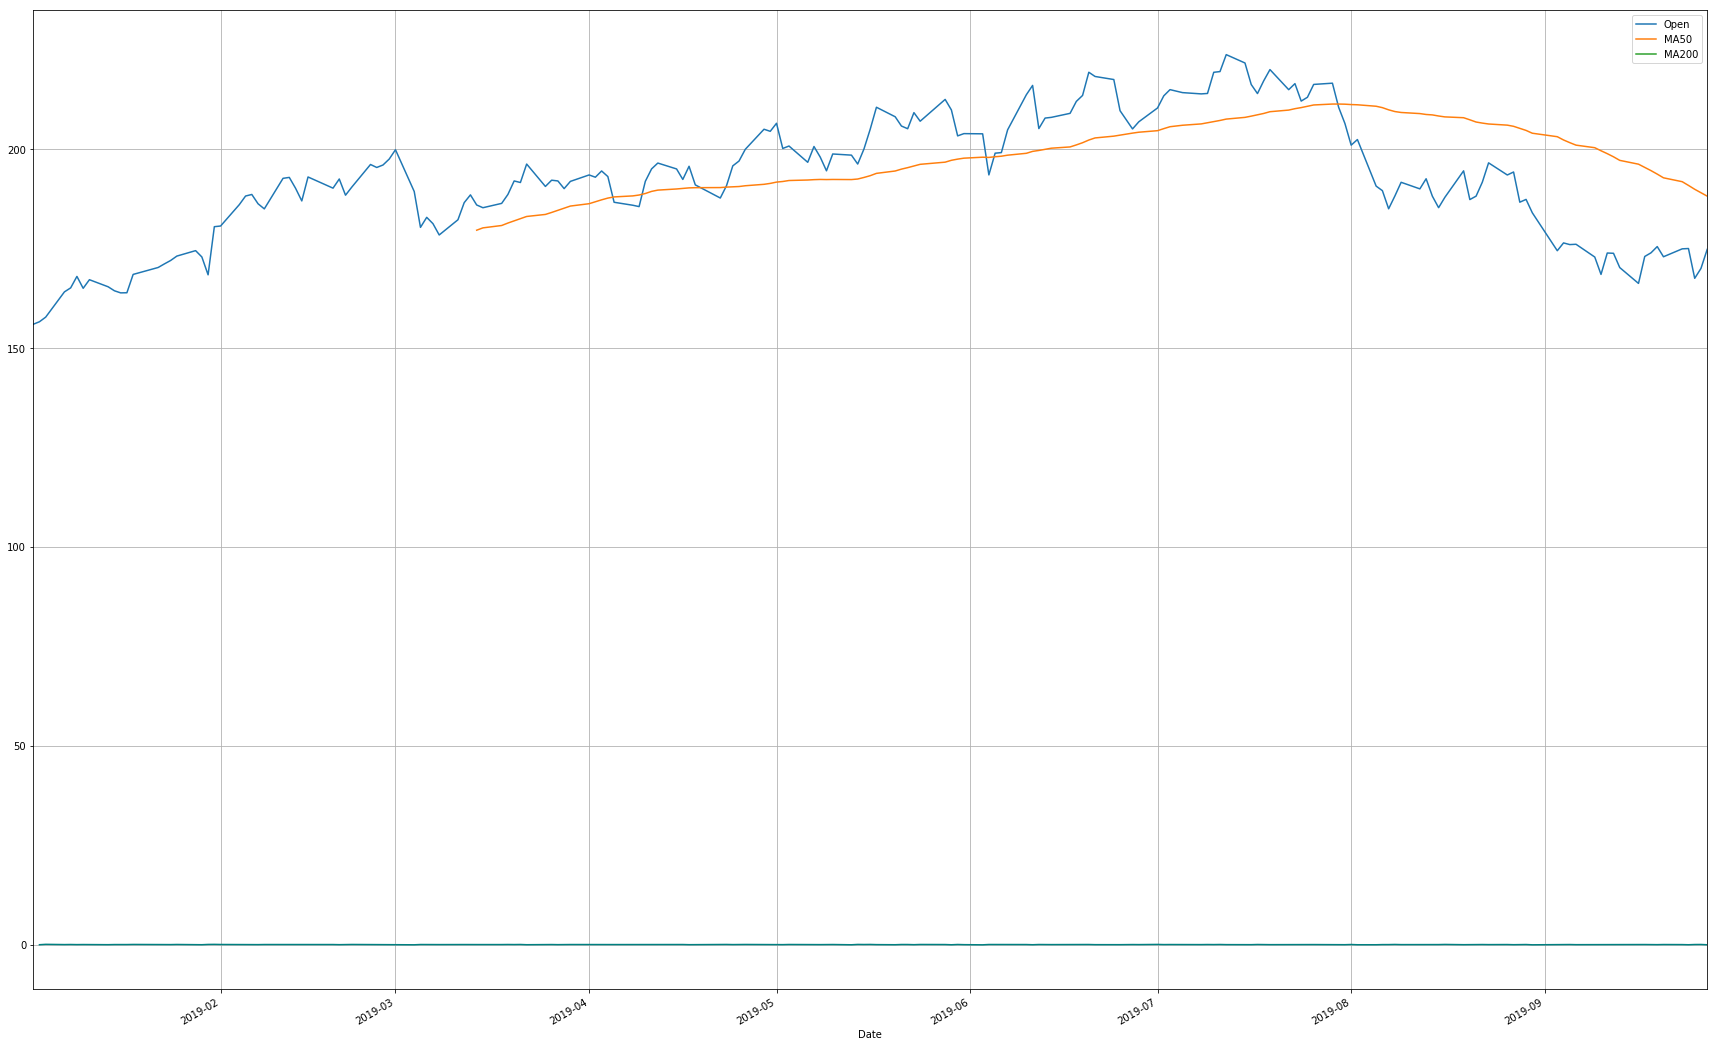

In [153]:
stock_analyse()